<h1 align=center><font size = 5> Exercise: Desnity-based Clustering (DBSCAN) </font></h1>

## The problem
We would like to analyze kernels of wheat to find a method through which we can group kernels by size. We will first consider clustering by just the size of the kernel (kernel length and width), and then we will look at creating clusters based on all numerical variables in the dataset.
In this notebook, we will load and explore <font color = "green"> 'seeds.txt' </font> in R, which is a dataset containing measurements of geometrical properties of kernels belonging to three different varieties of wheat. 

The DBSCAN algorithm combines data points that are closely packed together into clusters based on the parameters **eps** and **minPts**. 

The **eps** parameter corresponds to the size of the neighborhood. 

The **minPts** parameter corresponds to the minimum number of points that must exist in this neighborhood to define it as a dense area. 

This exercise covers:

1. Installing and loading the DBSCAN library and the data in R
2. Creating a subset containing kernel length and width from the datatset
3. Using the dbscan function to obtain clusters
4. Converting the clusters to factors 
5. Attaching the clusters to the measurements
6. Visualizing the results
7. Considering all numerical variables
8. Conclusion


## Installing and loading the DBSCAN library and the data in R
We begin by installing the dbscan package and loading it along with the dataset .



In [1]:
# Installing the library 'dbscan'
install.packages("dbscan", dependencies = TRUE)
library('dbscan')

also installing the dependencies 'DEoptimR', 'processx', 'rprojroot', 'diffobj', 'rematch2', 'mclust', 'flexmix', 'prabclus', 'diptest', 'robustbase', 'kernlab', 'brio', 'callr', 'cli', 'desc', 'ellipsis', 'lifecycle', 'pkgload', 'praise', 'ps', 'rlang', 'waldo', 'withr', 'fpc', 'microbenchmark', 'testthat', 'dendextend'




  There are binary versions available but the source versions are later:
               binary source needs_compilation
DEoptimR        1.0-8 1.0-11             FALSE
processx        3.5.2  3.8.0              TRUE
rprojroot       2.0.2  2.0.3             FALSE
diffobj         0.3.4  0.3.5              TRUE
mclust          5.4.7  6.0.0              TRUE
flexmix        2.3-17 2.3-18             FALSE
robustbase     0.93-6 0.95-0              TRUE
kernlab        0.9-29 0.9-31              TRUE
brio            1.1.2  1.1.3              TRUE
callr           3.7.0  3.7.3             FALSE
cli             2.5.0  3.5.0              TRUE
desc            1.3.0  1.4.2             FALSE
lifecycle       1.0.0  1.0.3             FALSE
pkgload         1.2.1  1.3.2             FALSE
ps              1.6.0  1.7.2              TRUE
rlang          0.4.11  1.0.6              TRUE
waldo           0.2.5  0.4.0             FALSE
withr           2.4.2  2.5.0             FALSE
fpc             2.2-9 2.2-10     

Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Erlangga\anaconda3\envs\RKernel\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\Erlangga\anaconda3\envs\RKernel\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'microbenchmark' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checked
package 'dbscan' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Erlangga\AppData\Local\Temp\RtmpwfNT6c\downloaded_packages


installing the source packages 'DEoptimR', 'rprojroot', 'flexmix', 'callr', 'desc', 'lifecycle', 'pkgload', 'waldo', 'withr', 'fpc', 'dendextend'

Warning message in install.packages("dbscan", dependencies = TRUE):
"installation of package 'callr' had non-zero exit status"Warning message in install.packages("dbscan", dependencies = TRUE):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("dbscan", dependencies = TRUE):
"installation of package 'waldo' had non-zero exit status"Warning message in install.packages("dbscan", dependencies = TRUE):
"installation of package 'pkgload' had non-zero exit status"Warning message:
"package 'dbscan' was built under R version 3.6.3"

In [2]:
# Load data
seeds <- read.csv("https://ibm.box.com/shared/static/c1aw37ex3sx99pb9q2l8fwz643wnbeo6.txt", sep = "	")
head(seeds)

area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,type
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


## Creating a subset from the dataset


In [3]:
# Creating the subset: The subset contains the kernel width and the kernel length
seeds.sub <- subset(seeds, select = c(width,length))
head(seeds.sub)


width,length
3.312,5.763
3.333,5.554
3.337,5.291
3.379,5.324
3.562,5.658
3.312,5.386


## Using the dbscan function to obtain clusters
Use the dbscan function to obtain clusters and store them in clusters_assignments1  
For this exercise we will use eps = 0.8 and minPts = 4  
Note: You can change the values to see the formation of different clusters  
Noise points are assigned to cluster 0 by default  

In [4]:
clusters_assignments1 <- dbscan(seeds.sub, eps = .08, minPts = 4)
clusters_assignments1 





DBSCAN clustering for 210 objects.
Parameters: eps = 0.08, minPts = 4
The clustering contains 4 cluster(s) and 40 noise points.

  0   1   2   3   4 
 40 128   8   4  30 

Available fields: cluster, eps, minPts

## Converting the clusters to factors


In [5]:
# Clusters must be converted to factor before plotting in different colors
clusters_assignments1$cluster <- as.factor(clusters_assignments1$cluster)
head(clusters_assignments1$cluster)




[1] 1 1 2 2 0 2
Levels: 0 1 2 3 4

## Attaching the clusters to the measurements


In [6]:
# Combine the cluster assignments with the subset
seeds.sub$cluster_no <- clusters_assignments1$cluster
head(seeds.sub)



width,length,cluster_no
3.312,5.763,1
3.333,5.554,1
3.337,5.291,2
3.379,5.324,2
3.562,5.658,0
3.312,5.386,2


## Visualizing the results


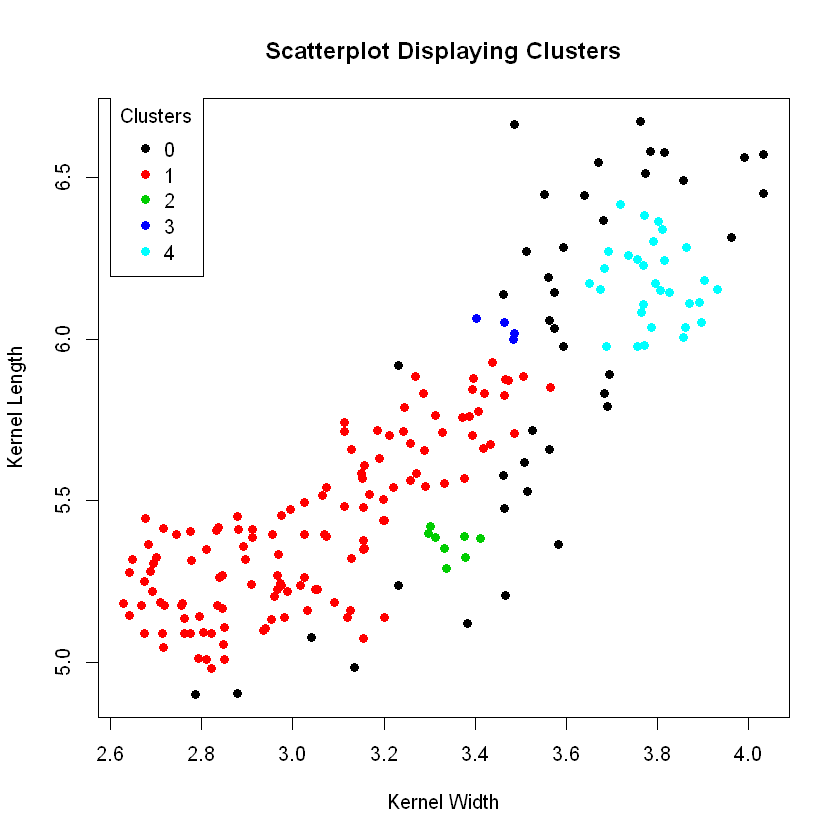

In [7]:
# Visualize results (noise is shown in black) using a simple plot
plot(seeds.sub$width, seeds.sub$length, col = clusters_assignments1$cluster, pch = 16, main = "Scatterplot Displaying Clusters", xlab = "Kernel Width", ylab = "Kernel Length")
legend(x = 2.6, y = 6.75, legend = levels(clusters_assignments1$cluster), col = c(1:5), pch = 16, title = "Clusters")





## Considering all numerical variables


DBSCAN clustering for 210 objects.
Parameters: eps = 0.9, minPts = 4
The clustering contains 4 cluster(s) and 15 noise points.

  0   1   2   3   4 
 15 134   4  52   5 

Available fields: cluster, eps, minPts

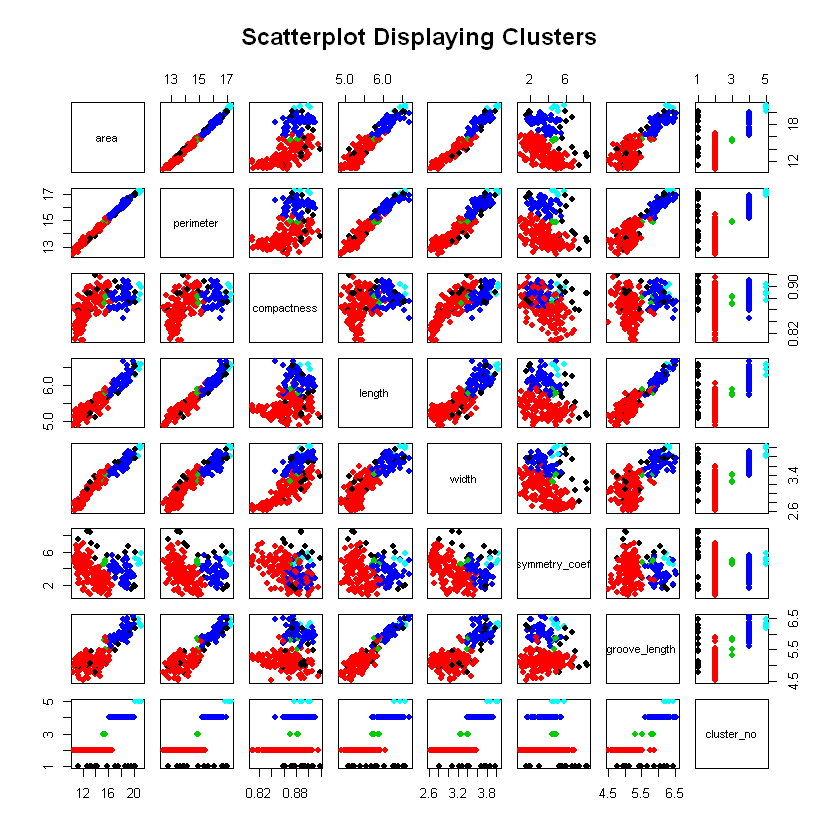

In [8]:
# Create subset including all numerical variables only.
# Note: The variable 'type' is categorical.
seeds.submain <- seeds[1:7]
# We will run the dbscan algorithm with eps = 0.9 and minPts = 4.
# Note: Using the previous value of eps = 0.08 will create only one cluster containing all datapoints.
clusters_assignments2 <- dbscan(seeds.submain, eps = .9, minPts = 4)
clusters_assignments2
# Clusters must be converted to factor before plotting in different colors
clusters_assignments2$cluster <- as.factor(clusters_assignments2$cluster)
# Linking the assigned cluster to each station
seeds.submain$cluster_no <- clusters_assignments2$cluster
# Visualize results using a pairs plot (noise is shown in black)
pairs(seeds.submain, col = clusters_assignments2$cluster, pch = 16, main = "Scatterplot Displaying Clusters")











<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Aside:</strong></font>
<br>
<br>
A pairs plot produces a matrix of scatterplots for each variable of the input dataset. To interpret a pairs plot consider it as a matrix with rows and columns. The variable stated in a row represents the variable that is used for the y-axis of all plots in that row. The variable stated in a column is the variable used for the x-axis of all plots in that column.<p></p>

</div>

## Conclusion

The results from both implementations of the DBSCAN algorithm provide somewhat similar clusters when considering the geometric size of the kernel (kernel length and width). In both cases, cluster 1 represents kernels of a smaller geometric size, which comprises more than 60% of the datapoints. However, the implementation using all the numerical variables has fewer noise points (represented as cluster 0).